## WfCommons to QUBO: Dealing with inequality constraints 

An inequality constraint:  $$h(x) = \sum_{i} l_i x_i  - C \leq 0$$

1) Using slacks: 

$$ \big(\sum_{i} l_i x_i + \sum_{k} 2^k s_k - C \big)^2 = 0  $$


2. Using the **unbalanced function** (A. Montanez-Barrera et al., 2022) :

$$ e^{h(x)} \approx 1 + h(x) + \frac{1}{2} h(x)^2 $$

$$ \lambda_1 \big(\sum_{i} l_i x_i - C\big) + \lambda_2 \big(\sum_{i} l_i x_i - C\big)^2 $$

2. Using the **unbalanced function** (A. Montanez-Barrera et al., 2022) :

$$ e^{h(x)} \approx 1 + h(x) + \frac{1}{2} h(x)^2 $$

$$ \lambda_1 \big(\sum_{i} l_i x_i - C\big) + \lambda_2 \big(\sum_{i} l_i x_i - C\big)^2 $$

In [1]:
import numpy as np
params_config = {
    'angles': [[1.9482, 4.2254, 4.1086, 5.7801, 4.1416, 3.8738],   # gammas
               [0.9043, 2.5178, 1.7931, 2.4655, 1.3755, 1.0457]],  # betas
    'hyper_args': [1, 2, 2], # obj. function, lambda_1, lambda_2
}

In [2]:
from QHyper.solvers import VQA, solver_from_config

solver_config = {
    "problem": {
        "type": "workflow_scheduling",
        "encoding": "binary",
        "tasks_file": "workflows_data/workflows/3_tasks_1_path.json",
        "machines_file": "workflows_data/machines/4_machines.json",
        "deadline": 13,
    },
    "solver": {
        "type": "vqa",
        "pqc": {
            "type": "qml_qaoa",
            "layers": 6,
            "optimizer": "qng",
            "optimizer_args": {
                "stepsize": 0.00045,
                "steps": 50,
                "verbose": True,
            },
            "backend": "default.qubit",
        },
        "params_inits": params_config
    }
}

vqa = solver_from_config(solver_config)

In [3]:
solver_results = vqa.solve()

Step 1/50: 395.1869821406809
Step 2/50: 306.0307396542473
Step 3/50: 273.5168936669108
Step 4/50: 260.5940565735004
Step 5/50: 254.2303367772227
Step 6/50: 250.40926054578563
Step 7/50: 247.71784774085984
Step 8/50: 245.5733611996606
Step 9/50: 243.70799684044803
Step 10/50: 241.99267922031143
Step 11/50: 240.3646955375157
Step 12/50: 238.79426110970402
Step 13/50: 237.26822769212436
Step 14/50: 235.7818761093793
Step 15/50: 234.334602637898
Step 16/50: 232.9275058316325
Step 17/50: 231.5619322298392
Step 18/50: 230.23854994315698
Step 19/50: 228.95676592924343
Step 20/50: 227.71441730178242
Step 21/50: 226.5077121697541
Step 22/50: 225.33140330123913
Step 23/50: 224.17916719642406
Step 24/50: 223.0441445178424
Step 25/50: 221.91958339019084
Step 26/50: 220.79951889451795
Step 27/50: 219.67942078232977
Step 28/50: 218.5567456691862
Step 29/50: 217.43133804810037
Step 30/50: 216.30563553514477
Step 31/50: 215.1846481413901
Step 32/50: 214.07569997914698
Step 33/50: 212.98794503910983
St

<AxesSubplot: xlabel='index', ylabel='value'>

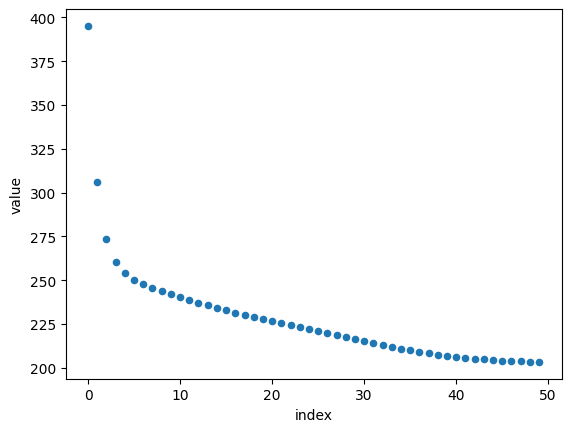

In [4]:
import pandas as pd

pd.DataFrame(solver_results.history[0]).reset_index().plot(x='index',y='value', kind='scatter')

In [5]:
print(f"Best params: {solver_results.params}")

Best params: {'angles': tensor([[1.94824404, 4.22606355, 4.10783934, 5.78004543, 4.14199089,
         3.87371591],
        [0.87116674, 2.61620323, 1.70712985, 2.43543308, 1.26776386,
         0.88477619]], requires_grad=True), 'hyper_args': tensor([1, 2, 2], requires_grad=True)}


In [6]:
from QHyper.util import (
    weighted_avg_evaluation, sort_solver_results, add_evaluation_to_results)

# Evaluate results with weighted average evaluation
print("Evaluation:")
print(weighted_avg_evaluation(
    solver_results.probabilities, vqa.problem.get_score,
    penalty=0, limit_results=20, normalize=True
))
print("Sort results:")
sorted_results = sort_solver_results(
    solver_results.probabilities, limit_results=20)

# Add evaluation to results
results_with_evaluation = add_evaluation_to_results(
    sorted_results, vqa.problem.get_score, penalty=0)

for result, (probability, evaluation) in results_with_evaluation.items():
    print(f"Result: {result}, "
          f"\t Prob: {probability:.5}, "
          f"\t Evaluation: {evaluation}")

Evaluation:
16.09368696345938
Sort results:
Result: 000001, 	 Prob: 0.23369, 	 Evaluation: 25.0
Result: 000101, 	 Prob: 0.043394, 	 Evaluation: 26.0
Result: 101001, 	 Prob: 0.037332, 	 Evaluation: 28.0
Result: 011010, 	 Prob: 0.037254, 	 Evaluation: 28.0
Result: 111101, 	 Prob: 0.036207, 	 Evaluation: 0
Result: 100101, 	 Prob: 0.03569, 	 Evaluation: 28.0
Result: 101101, 	 Prob: 0.028978, 	 Evaluation: 0
Result: 011101, 	 Prob: 0.027494, 	 Evaluation: 0
Result: 110001, 	 Prob: 0.026161, 	 Evaluation: 0
Result: 000010, 	 Prob: 0.02585, 	 Evaluation: 0
Result: 010101, 	 Prob: 0.025357, 	 Evaluation: 28.0
Result: 111001, 	 Prob: 0.023499, 	 Evaluation: 0
Result: 100001, 	 Prob: 0.023403, 	 Evaluation: 27.0
Result: 010001, 	 Prob: 0.022452, 	 Evaluation: 27.0
Result: 010100, 	 Prob: 0.022427, 	 Evaluation: 0
Result: 010111, 	 Prob: 0.022149, 	 Evaluation: 0
Result: 011110, 	 Prob: 0.020162, 	 Evaluation: 0
Result: 001010, 	 Prob: 0.019498, 	 Evaluation: 0
Result: 101010, 	 Prob: 0.017514, 	

In [7]:
solver_config = {
    "problem": {
        "type": "workflow_scheduling",
        "encoding": "one-hot",
        "tasks_file": "workflows_data/workflows/srasearch_22_tasks.json", 
        "machines_file": "workflows_data/machines/cyfronet.json",
        "deadline": 5000,
    },
    "solver": {
        "type": "cqm",
        "time": 10,
    }
}

cqm = solver_from_config(solver_config)

In [8]:
result = cqm.solve()

In [9]:
cqm.problem.decode_solution(result)

{'bowtie2-build_ID0000001': 'AresCpu',
 'bowtie2_ID0000021': 'AresGpu',
 'merge_ID0000022': 'ZeusCpu',
 'bowtie2_ID0000003': 'AresGpu',
 'fasterq-dump_ID0000004': 'AresGpu',
 'bowtie2_ID0000005': 'PrometeusGpu',
 'fasterq-dump_ID0000006': 'AresGpu',
 'bowtie2_ID0000007': 'PrometeusGpu',
 'fasterq-dump_ID0000008': 'AresGpu',
 'bowtie2_ID0000009': 'PrometeusGpu',
 'fasterq-dump_ID0000010': 'AresGpu',
 'bowtie2_ID0000011': 'PrometeusGpu',
 'fasterq-dump_ID0000012': 'AresGpu',
 'fasterq-dump_ID0000002': 'AresGpu',
 'bowtie2_ID0000013': 'PrometeusGpu',
 'fasterq-dump_ID0000014': 'AresGpu',
 'bowtie2_ID0000015': 'PrometeusGpu',
 'fasterq-dump_ID0000016': 'AresGpu',
 'bowtie2_ID0000017': 'AresGpu',
 'fasterq-dump_ID0000018': 'AresGpu',
 'bowtie2_ID0000019': 'PrometeusGpu',
 'fasterq-dump_ID0000020': 'AresGpu'}